In [1]:
#1
# Import the packages we will use

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read the data
df = pd.read_csv(r'/Users/noahbogatinoff/Downloads/Data Analyst Portfolio/Python Exploration:Correlation project/movies.csv')


In [2]:
#2
# Understand what the data looks like before altering anything

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#3
# run a for loop to see if any data is missing

for i in df.columns:
    print(i, "-", df[i].isnull().sum())

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [4]:
#4
# Check the data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#5
# Fill in the missing values with the 
# mean of each column with float64 data type

df.fillna(df.mean(), inplace=True)

In [6]:
#6
# run a for loop again to check what data is still missing

for i in df.columns:
    print(i, "-", df[i].isnull().sum())

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 0
votes - 0
director - 0
writer - 3
star - 1
country - 3
budget - 0
gross - 0
company - 17
runtime - 0


In [7]:
#7
# Fill empty cells in non-numerical columns 
# with arbitrary string value

df[['rating','writer','star','country', 'company']] = df[['rating','writer','star','country', 'company']].fillna('NA')

In [8]:
#8
# Drop final 'NaN' value vells in 'released' column

df.dropna(subset = ['released'], inplace=True)

In [9]:
#9
# Check the data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#10
# Remove unnecessary digit after decimal 
# in 'Budget' and 'Gross' columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [11]:
#11
# Create new column to show simplified date format
before_symbol = df['released'].str.split('(').str[0]

df['released_dt'] = before_symbol

In [12]:
#12
# correct the year in reference to the 'released' column by 
# creating a new column

df['year_correct'] = df['released_dt'].astype(str).str[-5:]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dt,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000,"June 20, 1980",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000,"July 2, 1980",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000,"July 25, 1980",1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NA,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NA,90.000000,"October 23, 2020",2020
7664,Dream Round,NA,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.000000,"February 7, 2020",2020
7665,Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613,"April 27, 2020",2020
7666,It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000,78500541,NA,120.000000,"October 1, 2020",2020


In [13]:
#13
# Order the data to show highest grossing films first

df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dt,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,"February 9, 2001",2001
7625,The Untold Story,NA,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,"January 11, 2019",2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,"June 26, 2020",2020
2417,Madadayo,NA,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,"April 17, 1993",1993


In [14]:
#14
# Display all rows of output

pd.set_option('display.max_rows', 25)

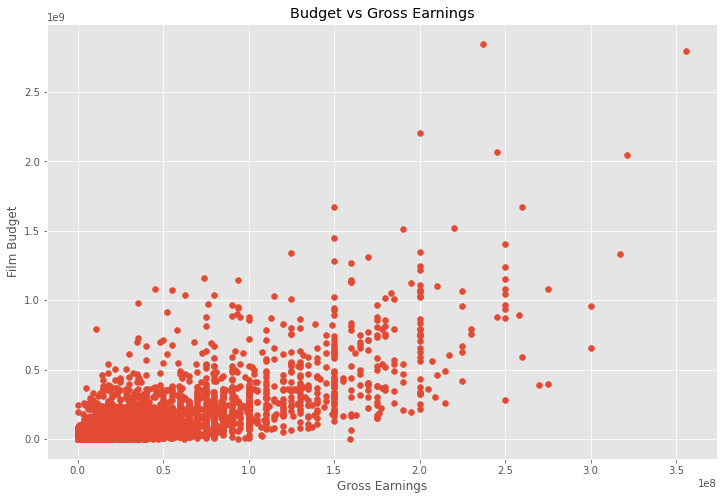

In [15]:
#15
# Build an inital scatter plot - budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')


plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

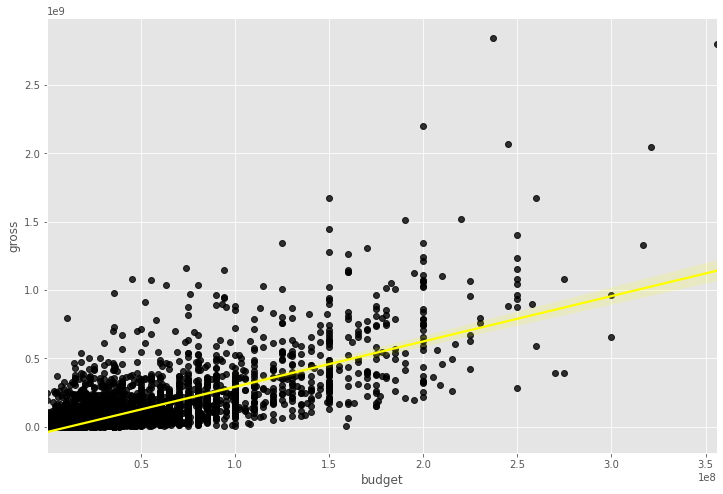

In [16]:
#16
#Use seaborn to plot 'Budget vs Gross'

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'black'}, line_kws={'color':'yellow'})

In [17]:
#17
# Look at general (pearson) correlation amongst our numerical columns

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098112,0.222818,0.265604,0.252066,0.120778
score,0.098112,1.000000,0.409221,0.064545,0.182880,0.399356
votes,0.222818,0.409221,1.000000,0.421007,0.628714,0.309167
budget,0.265604,0.064545,0.421007,1.000000,0.711270,0.265287
gross,0.252066,0.182880,0.628714,0.711270,1.000000,0.241335
runtime,0.120778,0.399356,0.309167,0.265287,0.241335,1.000000


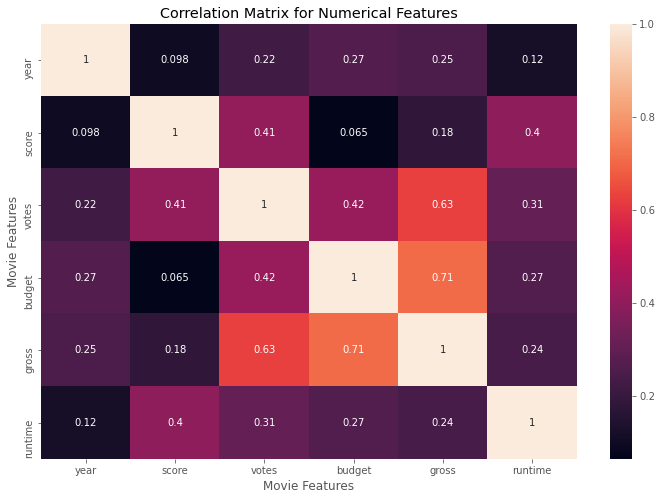

In [18]:
#18
#visualize correlation matrix using seaborn's heatmap

correaltion_matrix = df.corr(method='pearson')

sns.heatmap(correaltion_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [19]:
#19
# Look at company vs gross renvenue
# Convert object data types into categorical variables
# to use further in correlation martix

df_cat = df

for col_name in df_cat.columns:
    if(df_cat[col_name].dtype == 'object'):
        df_cat[col_name] = df_cat[col_name].astype('category')
        df_cat[col_name] = df_cat[col_name].cat.codes
    
df_cat

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dt,year_correct
0,6586,7,6,1980,1705,8.400000,9.270000e+05,2589,4015,1047,55,19000000,46998772,2320,146.000000,1510,0
1,5572,7,1,1980,1492,5.800000,6.500000e+04,2269,1632,327,56,4500000,58853106,731,104.000000,1311,0
2,5141,5,0,1980,1771,8.700000,1.200000e+06,1111,2567,1745,56,18000000,538375067,1540,124.000000,1568,0
3,286,5,4,1980,1492,7.700000,2.210000e+05,1301,2000,2247,56,3500000,83453539,1813,88.000000,1311,0
4,1027,7,4,1980,1543,7.300000,1.080000e+05,1054,521,410,56,6000000,39846344,1778,98.000000,1360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,2,6,2020,2964,3.100000,1.800000e+01,1500,2289,2422,56,7000,78500541,1690,90.000000,2582,40
7664,1678,2,4,2020,1107,4.700000,3.600000e+01,774,2614,1886,56,35589876,78500541,539,90.000000,975,40
7665,4717,2,6,2020,193,5.700000,2.900000e+01,2061,2683,2041,56,58750,78500541,941,107.261613,162,40
7666,2843,2,6,2020,2817,6.390411,8.810850e+04,1184,1824,450,56,15000,78500541,1690,120.000000,2462,40


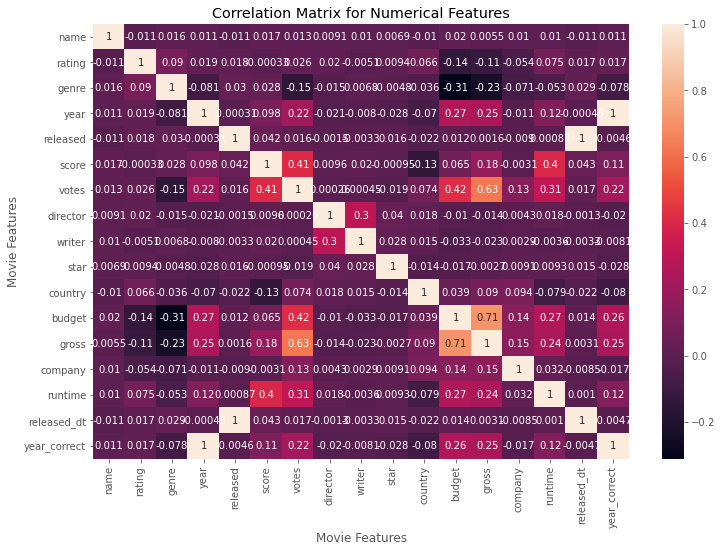

In [20]:
#20
# visualize correlation matrix using seaborn's 
# heatmap with the categorical object variables

correaltion_matrix = df_cat.corr(method='pearson')

sns.heatmap(correaltion_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [21]:
#21
# Check the correlation of the new categorical variables

df_cat.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_dt,year_correct
name,1.000000,-0.010806,0.016173,0.011245,-0.010901,0.017258,0.013067,0.009111,0.009986,0.006919,-0.010145,0.020369,0.005465,0.010000,0.010391,-0.010811,0.010697
rating,-0.010806,1.000000,0.089934,0.018781,0.017543,-0.000333,0.026084,0.020099,-0.005134,0.009373,0.066349,-0.135818,-0.112277,-0.053586,0.074958,0.016607,0.017414
genre,0.016173,0.089934,1.000000,-0.081426,0.030138,0.028084,-0.145299,-0.015242,0.006834,-0.004811,-0.036293,-0.310586,-0.230282,-0.070517,-0.052702,0.029355,-0.077911
year,0.011245,0.018781,-0.081426,1.000000,-0.000311,0.098112,0.222818,-0.020785,-0.008048,-0.027747,-0.069722,0.265604,0.252066,-0.011279,0.120778,-0.000446,0.997415
released,-0.010901,0.017543,0.030138,-0.000311,1.000000,0.042480,0.016128,-0.001503,-0.003251,0.015564,-0.021970,0.012267,0.001637,-0.009050,0.000868,0.999912,-0.004644
score,0.017258,-0.000333,0.028084,0.098112,0.042480,1.000000,0.409221,0.009553,0.019647,-0.000945,-0.134457,0.064545,0.182880,-0.003077,0.399356,0.042609,0.105932
votes,0.013067,0.026084,-0.145299,0.222818,0.016128,0.409221,1.000000,0.000262,0.000454,-0.019440,0.073858,0.421007,0.628714,0.131578,0.309167,0.017143,0.218300
director,0.009111,0.020099,-0.015242,-0.020785,-0.001503,0.009553,0.000262,1.000000,0.299528,0.039653,0.017724,-0.010364,-0.014272,0.004301,0.017624,-0.001300,-0.020422
writer,0.009986,-0.005134,0.006834,-0.008048,-0.003251,0.019647,0.000454,0.299528,1.000000,0.028000,0.014646,-0.033243,-0.023215,0.002856,-0.003639,-0.003277,-0.008087
star,0.006919,0.009373,-0.004811,-0.027747,0.015564,-0.000945,-0.019440,0.039653,0.028000,1.000000,-0.014393,-0.016943,-0.002677,0.009128,0.009304,0.015385,-0.028105


In [22]:
#22
# Unstack the correlation matrix

correlation_mat = df_cat.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.010806
              genre           0.016173
              year            0.011245
              released       -0.010901
                                ...   
year_correct  gross           0.245462
              company        -0.016517
              runtime         0.120604
              released_dt    -0.004723
              year_correct    1.000000
Length: 289, dtype: float64

In [23]:
#23
# Sort the unstacked matrix by correlation values

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.310586
genre         budget         -0.310586
              gross          -0.230282
gross         genre          -0.230282
votes         genre          -0.145299
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
released_dt   released_dt     1.000000
year_correct  year_correct    1.000000
Length: 289, dtype: float64

In [24]:
#24
#display the pairs with high correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


votes         gross           0.628714
gross         votes           0.628714
budget        gross           0.711270
gross         budget          0.711270
year_correct  year            0.997415
year          year_correct    0.997415
released      released_dt     0.999912
released_dt   released        0.999912
name          name            1.000000
writer        writer          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
released_dt   released_dt     1.000000
year_correct  year_correct    1.000000
dtype: float64